<a href="https://colab.research.google.com/github/vinicius-mattoso/GA_find_percolation/blob/main/Maze_Solver_bfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
def solve_maze(maze, starts, ends):
    def is_valid_move(pos):
        return 0 <= pos[0] < maze.shape[0] and 0 <= pos[1] < maze.shape[1] and maze[pos[0], pos[1]] == 0

    def get_adjacent_positions(pos):
        adj_pos = []
        for d in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            adj_pos.append((pos[0] + d[0], pos[1] + d[1]))
        return adj_pos

    def bfs(start, end):
        queue = [(start, [start])]
        visited = set()
        while queue:
            (x, y), path = queue.pop(0)
            if (x, y) == end:
                return path
            if (x, y) not in visited:
                visited.add((x, y))
                for next_pos in get_adjacent_positions((x, y)):
                    if is_valid_move(next_pos):
                        next_path = list(path)
                        next_path.append(next_pos)
                        queue.append((next_pos, next_path))

        return None

    def validate_starts(starts):
        return [s for s in starts if is_valid_move(s)]

    valid_starts = validate_starts(starts)
    if len(valid_starts) == 0:
        return None

    shortest_path = None
    all_paths = []
    shortest_path_length = float('inf')
    for start in valid_starts:
        for end in ends:
            path = bfs(start, end)
            if path is not None:
              all_paths.append(path)
            if path is not None and len(path) < shortest_path_length:
                shortest_path = path
                shortest_path_length = len(path)

    return shortest_path, all_paths if shortest_path is not None else None

In [ ]:
def create_maze(size):
    maze = np.zeros(size, dtype=int)

    # Generate random walls
    for i in range(size[0]):
        for j in range(size[1]):
            # if random.random() < 0.3:
              if random.random() < 0.35:
                maze[i, j] = 1

    return maze

In [ ]:
def draw_maze(maze, starts, ends, path=None):
    cmap = colors.ListedColormap(['white', 'black', 'red', 'blue'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(maze, cmap=cmap, norm=norm)

    for start in starts:
        ax.plot(start[1], start[0], 'go', markersize=5)

    for end in ends:
        ax.plot(end[1], end[0], 'ro', markersize=5)

    if path is not None:
        for i in range(len(path)-1):
            curr_pos = path[i]
            next_pos = path[i+1]
            ax.plot([curr_pos[1], next_pos[1]], [curr_pos[0], next_pos[0]], 'b-', linewidth=3)

    plt.show()

In [ ]:
def draw_maze_paths(maze, starts, ends, all_paths=None):
    cmap = colors.ListedColormap(['white', 'black', 'red', 'blue'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(maze, cmap=cmap, norm=norm)

    for start in starts:
        ax.plot(start[1], start[0], 'go', markersize=5)

    for end in ends:
        ax.plot(end[1], end[0], 'ro', markersize=5)

    if all_paths is not None:
      for path in all_paths:
        for i in range(len(path)-1):
            curr_pos = path[i]
            next_pos = path[i+1]
            # ax.plot([curr_pos[1], next_pos[1]], [curr_pos[0], next_pos[0]], 'b-', linewidth=3)
            ax.plot([curr_pos[1], next_pos[1]], [curr_pos[0], next_pos[0]], linewidth=3)

    plt.show()

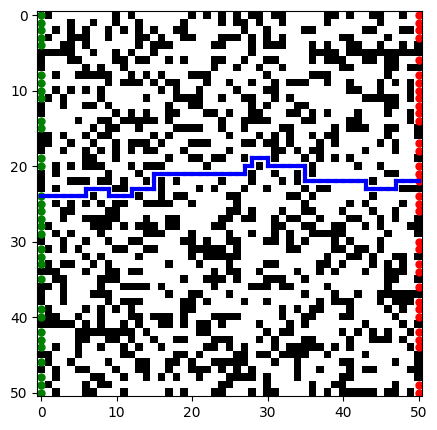

Muito bem, esse meio poroso é percolado!
O caminho possui : 63 pontos
9.228019952774048 segundos


In [ ]:
import time
tempo_inicial = time.time() # em segundos
# Example usage
import random

start = 0
end  = 50

maze = create_maze((end+1, end+1))

entradas = maze[:,0]
lista_entradas = []
linhas_entradas = np.where(entradas == 0)
linhas_entradas = linhas_entradas[0].tolist()
for i in range(0,len(linhas_entradas)):
    # print(i)
    lista_entradas.append((linhas_entradas[i], start))

saidas = maze[:,-1]
lista_saidas = []
linhas_saidas = np.where(saidas == 0)
linhas_saidas = linhas_saidas[0].tolist()
for i in range(0,len(linhas_saidas)):
    # print(i)
    lista_saidas.append((linhas_saidas[i], end))


starts = lista_entradas
ends = lista_saidas

path, all_paths = solve_maze(maze, starts, ends)

draw_maze(maze, starts, ends, path)

if path == None:
  print('Não foi encontrado nenhum caminho entre os pontos do inicio e do fim do meio poroso')

else:
  print('Muito bem, esse meio poroso é percolado!')
  print(f'O caminho possui : {len(path)} pontos')


tempo_final = time.time() # em segundos
#Print do tempo que demorou para rodar a parte específica do código
print(f"{tempo_final - tempo_inicial} segundos")
# print(path)

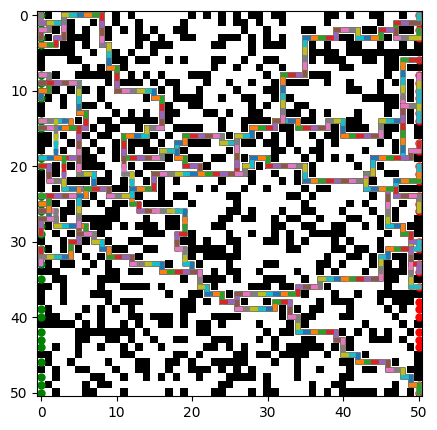

In [ ]:
draw_maze_paths(maze, starts, ends, all_paths)